In [1]:
import os
os.environ["KERAS_BACKEND"]="tensorflow"
import keras as keras

In [33]:
# Create first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy 

In [34]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [35]:
import pandas as pd 

In [36]:
forest=pd.read_csv("E:/Ravi_ExcelR_Assignments/NeuralNetwork/forestfires.csv")
forest 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [37]:
#Data Structure 
type(forest)
forest.shape

(517, 31)

In [38]:
#data types
forest.dtypes 

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [39]:
from sklearn import preprocessing

In [40]:
label_encoder = preprocessing.LabelEncoder()
forest['day']= label_encoder.fit_transform(forest['day'])  

In [41]:
label_encoder = preprocessing.LabelEncoder()
forest['size_category']= label_encoder.fit_transform(forest['size_category']) 

In [42]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
forest.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

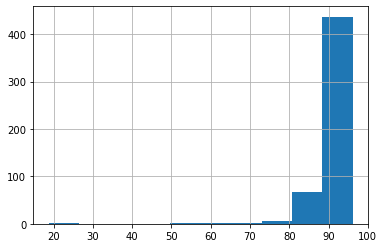

In [44]:
# histogram of FFMC
forest['FFMC'].hist() 

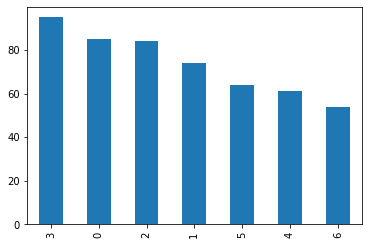

In [45]:
#Bar plot
forest['day'].value_counts().plot.bar() 

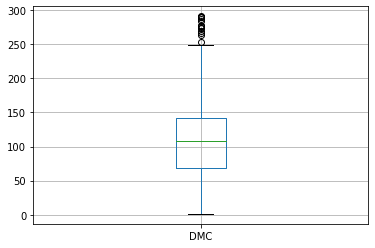

In [46]:
#Box plot
forest.boxplot(column=['DMC']) 

In [47]:
#Descriptive stat
forest['DMC'].describe() 

count    517.000000
mean     110.872340
std       64.046482
min        1.100000
25%       68.600000
50%      108.300000
75%      142.400000
max      291.300000
Name: DMC, dtype: float64

In [48]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [49]:
X = forest.drop(["area","month"],inplace=False,axis=1) 

In [50]:
X

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,...,0,0,0,0,1,0,0,0,0,1
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,...,0,0,0,0,0,0,0,0,0,0
513,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,...,0,0,0,0,0,0,0,0,0,0
514,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,...,0,0,0,0,0,0,0,0,0,0
515,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
Y= forest["area"]

In [52]:
Y 

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [53]:
forest.shape

(517, 31)

In [54]:
# create model using bias initializer which reduce bias
model = Sequential()# below 3 models build sequentially
model.add(Dense(16, input_dim=29, bias_initializer='uniform', activation='relu'))
model.add(Dense(8, bias_initializer='uniform', activation='relu')) 
model.add(Dense(1, bias_initializer='uniform', activation='sigmoid'))

In [55]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error']) #For Regression loss='mean_squared_error' 

In [56]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=100) 

Epoch 1/10
4/4 [==============================] - 0s 56ms/step - loss: 4130.3936 - mean_squared_error: 4130.3936 - val_loss: 4368.8218 - val_mean_squared_error: 4368.8218
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 4130.3911 - mean_squared_error: 4130.3911 - val_loss: 4368.7100 - val_mean_squared_error: 4368.7100
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 4130.3853 - mean_squared_error: 4130.3853 - val_loss: 4368.5112 - val_mean_squared_error: 4368.5112
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 4130.3535 - mean_squared_error: 4130.3535 - val_loss: 4368.3364 - val_mean_squared_error: 4368.3364
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 4130.3359 - mean_squared_error: 4130.3359 - val_loss: 4368.2080 - val_mean_squared_error: 4368.2080
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 4130.3062 - mean_squared_error: 4130.3062 - val_loss: 4368.1587 - val_mean_sq

In [57]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  

17/17 [==============================] - 0s 1ms/step - loss: 4208.9360 - mean_squared_error: 4208.9360
mean_squared_error: 420893.60%


In [58]:
# create model using kernel initializer which reduce Weights
model = Sequential()# below 3 models build sequentially
model.add(Dense(16, input_dim=29, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [59]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error']) 

In [60]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=100) 

Epoch 1/10
4/4 [==============================] - 0s 46ms/step - loss: 4118.6938 - mean_squared_error: 4118.6938 - val_loss: 4351.4390 - val_mean_squared_error: 4351.4390
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 4117.5967 - mean_squared_error: 4117.5967 - val_loss: 4349.8872 - val_mean_squared_error: 4349.8872
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 4116.2441 - mean_squared_error: 4116.2441 - val_loss: 4348.1504 - val_mean_squared_error: 4348.1504
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 4115.2573 - mean_squared_error: 4115.2573 - val_loss: 4346.2246 - val_mean_squared_error: 4346.2246
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 4113.8037 - mean_squared_error: 4113.8037 - val_loss: 4344.3008 - val_mean_squared_error: 4344.3008
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 4112.4302 - mean_squared_error: 4112.4302 - val_loss: 4342.5884 - val_mean_s

In [61]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  

17/17 [==============================] - 0s 1ms/step - loss: 4185.3257 - mean_squared_error: 4185.3257
mean_squared_error: 418532.57%


In [63]:
# create model using kernel initializer which reduce Weights
model = Sequential()# below 3 models build sequentially
model.add(Dense(16, input_dim=29, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu')) 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [64]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error']) 

In [65]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=100) 

Epoch 1/10
4/4 [==============================] - 0s 61ms/step - loss: 4119.9604 - mean_squared_error: 4119.9604 - val_loss: 4353.9102 - val_mean_squared_error: 4353.9102
Epoch 2/10
4/4 [==============================] - 0s 16ms/step - loss: 4119.4634 - mean_squared_error: 4119.4634 - val_loss: 4353.2627 - val_mean_squared_error: 4353.2627
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 4119.0078 - mean_squared_error: 4119.0078 - val_loss: 4352.5840 - val_mean_squared_error: 4352.5840
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 4118.5894 - mean_squared_error: 4118.5894 - val_loss: 4352.0737 - val_mean_squared_error: 4352.0737
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 4118.2573 - mean_squared_error: 4118.2573 - val_loss: 4351.4458 - val_mean_squared_error: 4351.4458
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 4117.7554 - mean_squared_error: 4117.7554 - val_loss: 4350.6084 - val_mean

In [66]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

17/17 [==============================] - 0s 1ms/step - loss: 4189.5488 - mean_squared_error: 4189.5488
mean_squared_error: 418954.88%
